# AI-1: ML/AI Basics
## Project: Applying Regression and Classification to predict House prices and their affordability in King County, Washington

Link to Video Presentation: 

For the final Project for AI 1, our Team Outliers : Rajat, Ruchin, Gursimran and Shishir, we chose to take up the problem of **predicting House prices and subsequently transform the idea into a classification one using a reliable and independent metric.**

![picture](https://drive.google.com/uc?id=1Do17SxEXr3CryAYkx11kH72W6yPnvdRn)


The data in the King County House prices was collected from the Houses sold in the time period of May 2014 to May 2015, and it comprises of 23 different features. The different columns in the dataset are as follows:

1. **Id** - Unique ID for each house sold

2. **Date** - Date of the house sale

3. **Price** - Price of each house sold

4. **Bedrooms** - Number of bedrooms in the House

5. **Bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

6. **sqft_living** - Square foot area of the apartment's interior living space.

7. **sqft_lot** - Square foot area of the land space.

8. **floors** - Number of floors

9. **waterfront** - A categorical variable for whether the apartment was overlooking the waterfront or not.

10. **view** - An index from 0 to 4 of how good the view of the property was.

11. **condition** - An index from 1 to 5 on the condition of the House.

12. **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

13. **sqft_above** - The square footage of the interior housing space that is above ground level.

14. **sqft_basement** - The square footage of the interior housing space that is below ground level.

15. **yr_built** - The year the house was initially built
16. **yr_renovated** - The year of the house’s last renovation
17. **zipcode** - What zipcode area the house is located in
18. **lat** - Lattitude
19. **long** - Longitude
20. **sqft_living15** - The square foot area of interior housing living space for the nearest 15 neighbors
21. **sqft_lot15** - The square foot area of the land lots of the nearest 15 neighbors

## Structure of the Project

1. **Part A** : Analyse the features and understand their relation with the prices using visualisations.
2. **Part B** : Building regression models and analysing the predictions to improve the results.
3. **Part C** : Converting the prices into a categorical variable and modelling classification algorithms to predict the same.

### Importing the required libraries

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from prettytable import PrettyTable
from sklearn import tree
import pydot
from six import StringIO
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
plt.rcParams['axes.edgecolor'] = 'black'

### Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data and taking a look at it.

df_kc = pd.read_csv('/content/drive/MyDrive/Project AI-1/kc_house_data.csv')
df_kc.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## Exploring the Dataset

Initially, we would like to get familiar with the variables in the dataset. Check for any missing values or converting the date string to a pandas datetime column.

In [ ]:
# Seeing the shape of the dataset and the feature columns.

print(df_kc.shape)
df_kc.columns

(21613, 21)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Converting the date feature to Pandas Date-time index.

df_kc['date'] = df_kc['date'].apply(lambda x: x.split('T')[0])
df_kc['date'] = pd.to_datetime(df_kc['date'])

In [ ]:
df_kc.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
df_kc.isnull().sum()

#no null values are there 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

# Part A : Exploratory Data Analysis

In this part, our main objective is to bring out the important relations among our features and the response variable. We also sought to access other interesting variations that might help us determining what features are more important and how they are behaving.

All the visualisations are followed by the inferences and insights gained from them.

Text(0.5, 1.0, 'Distribution of Prices for the Dataset')

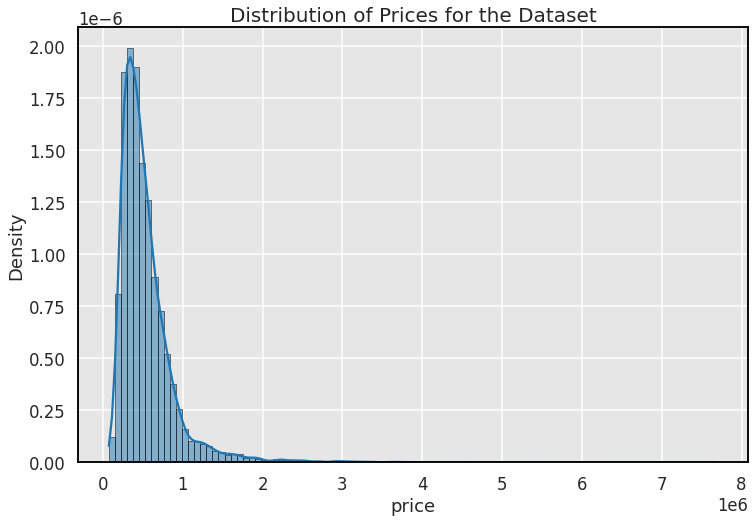

In [ ]:
# plotting a distribution of prices for the dataset.

plt.figure(figsize=(12,8))

sns.histplot(x = 'price', data=df_kc, bins=100, ec='k', lw=0.5, stat = 'density', kde=True)
plt.title("Distribution of Prices for the Dataset", size=20)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**The plot shows that the distribution contains more count of prices in the lower range and a very small count in comparatively higher price ranges.**

Text(0.5, 1.0, 'Distribution of Prices on a Log Scale')

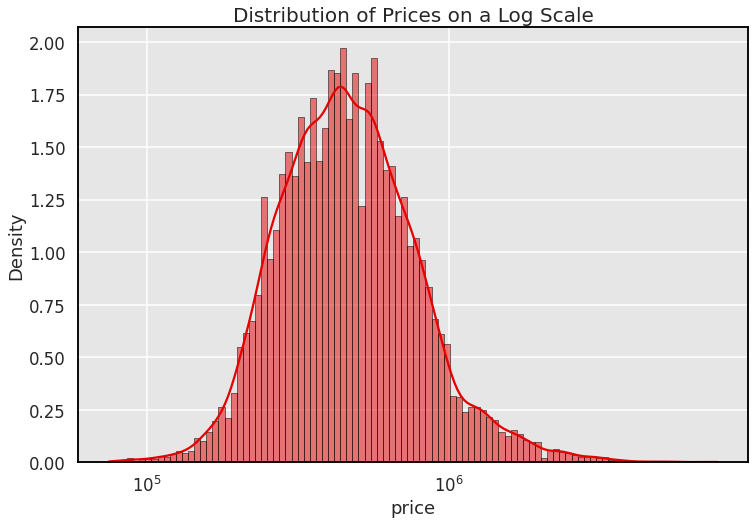

In [ ]:
# plotting a distribution of prices for the dataset on log scale.

plt.figure(figsize=(12,8))

sns.histplot(x = 'price', data=df_kc, bins=100, ec='k', lw=0.5, color='xkcd:red', stat = 'density', kde=True,log_scale=True)
plt.title("Distribution of Prices on a Log Scale" , size=20)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Plotting the above distribution on a log scale clearly shows that the distribution of prices is slightly right-skewed, therefore containing some outliers in the dataset.**

Text(0, 0.5, 'Correlation')

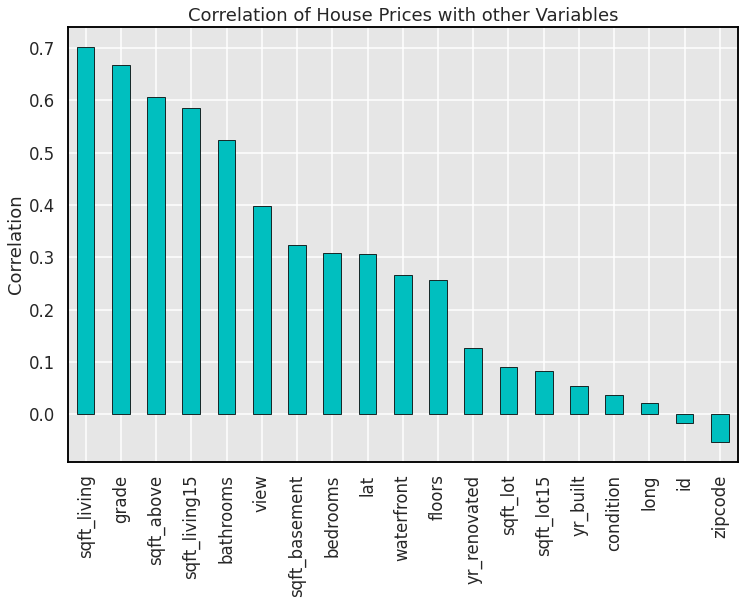

In [ ]:
# Correlation of the predictor variables with the response variable.

df_kc.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar', figsize=(12,8), ec= 'k', lw ='0.8', color = 'c')
plt.title("Correlation of House Prices with other Variables")
plt.ylabel("Correlation")

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Here we plotted the correlation value of all the variable with the response variable price, which suggests a huge correlation with certain variables, while some which do not correlate a lot such as id, zipcode, longitude**

Text(0.5, 1.0, 'House Prices as a function of Sq. ft. Space and the Year of Building')

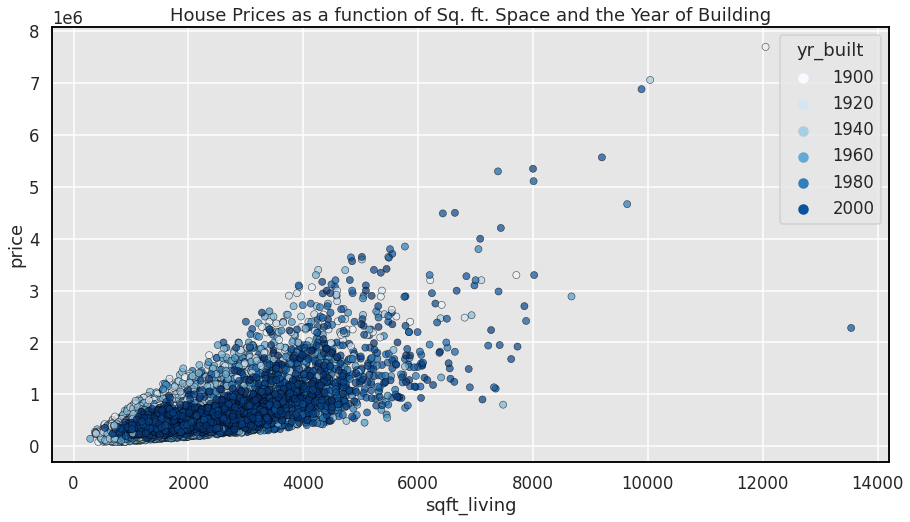

In [ ]:
# Scatter plot of the maximum correlated predictor, Sqft_living and response variable, Price.

plt.figure(figsize=(15,8))
sns.scatterplot(y='price',x='sqft_living',data=df_kc, hue='yr_built', alpha=0.7, ec='k', lw=0.5, s=50,  palette='Blues')
plt.title("House Prices as a function of Sq. ft. Space and the Year of Building")

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**The scatter plot of price against the area of the house in sq.ft. shows a discernable linear trend. An interesting fact which emerged from classifying the houses according the year of building shows that the older houses with the same amount of area generally have a significantly higher price, almost being doubled or tripled in many cases.**

**In general, we expect newer houses to have a higher price, but that is certainly not the case we see here.**

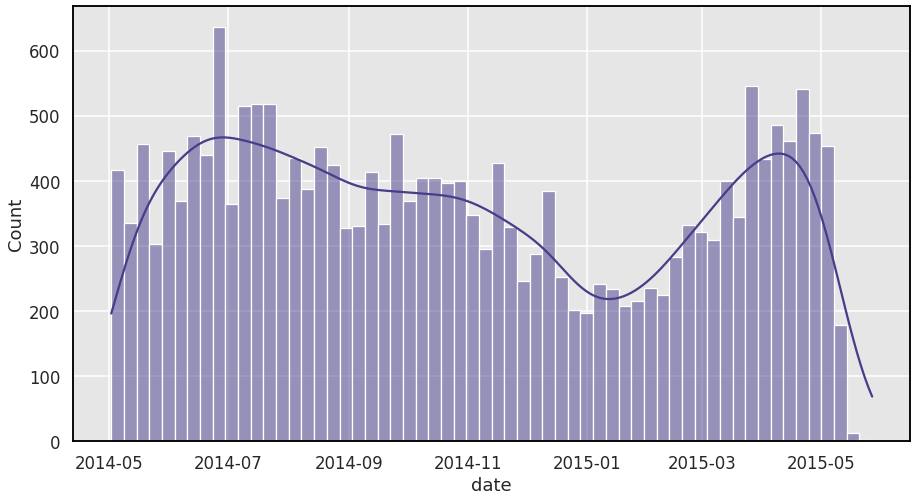

In [ ]:
# Distribution of Dates on which the Houses were Bought.

plt.figure(figsize=(15,8))
sns.histplot(x='date', data=df_kc, bins=60, kde=True, color= "darkslateblue")

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Plotting a distribution of dates in our dataset, shows a unique trend of downfall in the buying of houses around the end of the year specially at the New year and Christmas Holiday months in the King County region.This is followed by a sharp increase as the year progresses.**

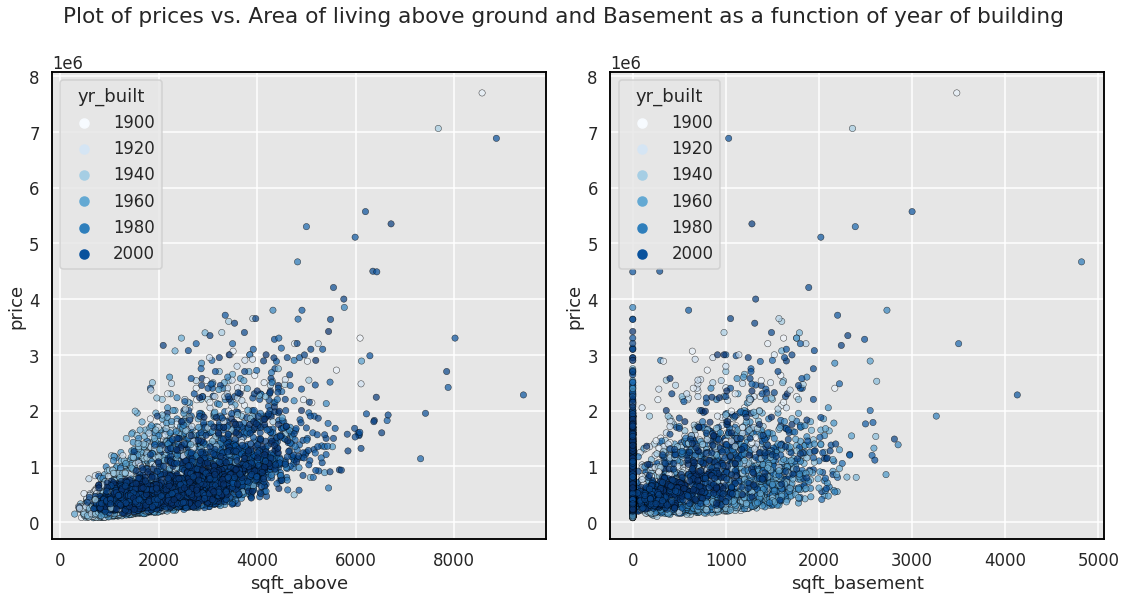

In [ ]:
# Plot for House Prices as Function of Sq. ft. above ground level and Basement area over different years.

fig, ax = plt.subplots(1,2, figsize=(16, 8))
sns.scatterplot(y='price',x='sqft_above',data=df_kc, hue='yr_built', alpha=0.7, ec='k', lw=0.5, s=40, palette='Blues', ax=ax[0])
sns.scatterplot(y='price',x='sqft_basement',data=df_kc, hue='yr_built', alpha=0.7,ec= 'k',lw= 0.5, s=40, palette='Blues', ax=ax[1])
plt.suptitle("Plot of prices vs. Area of living above ground and Basement as a function of year of building", y=1.05)
plt.tight_layout()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**We plotted the two features quantifying the area of living above ground and the area of basement, both of which show somewhat similar trends. The more interesting fact here is the spread in area of basement with years. We see a lot of houses built recently with no basement area , while most older houses having the same and also possesing very large areas of basement as well. This shows that there is a gradual decline towards preferring a basement while building a house**

Text(0.5, 1.0, 'Mean House Prices As A Function Of Their Construction Grade')

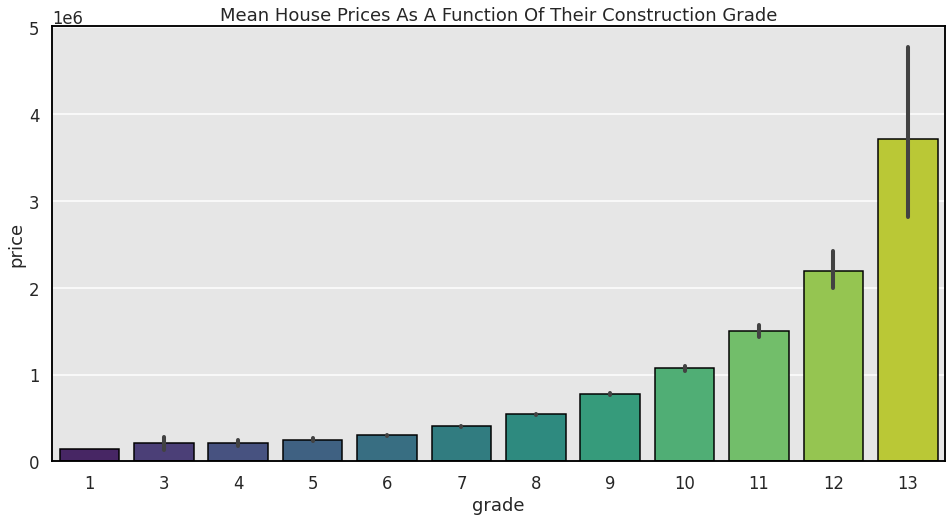

In [ ]:
# plotting Mean House Prices As A Function Of Their Construction Grade.

plt.figure(figsize=(16,8))

sns.barplot(x='grade', y='price', data=df_kc, ec='k', lw=1.5, palette='viridis')
plt.title("Mean House Prices As A Function Of Their Construction Grade")

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**This plot very well indicates an upward trend of prices as the construction grade of the House improves. This variable measures how good the design and construction of the House is, which understandably equates to a higher mean price for a high grade.**

Text(0.5, 1.0, 'No. of Bedrooms vs Price according to the level of their Construction Grade')

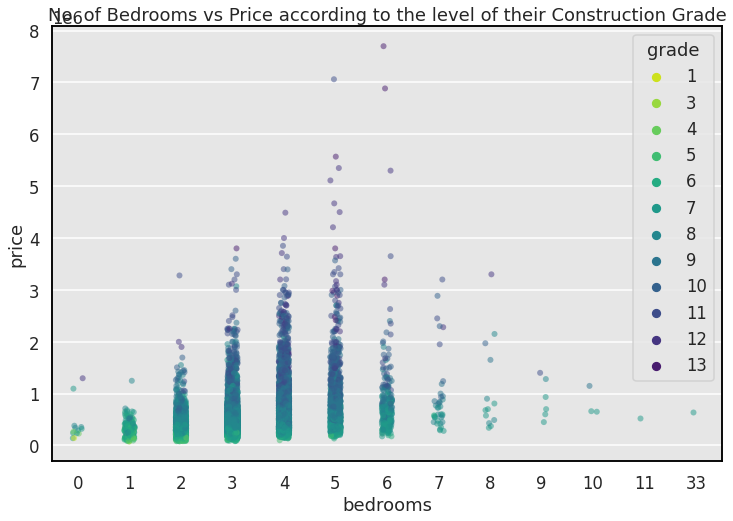

In [ ]:
# Plot for No. of Bedrooms vs. their price according to the level of their construction grade.

plt.figure(figsize=(12,8))
sns.stripplot(x="bedrooms", y='price', hue = 'grade', data=df_kc, size=6, edgecolor='k', alpha=0.5, palette='viridis_r')
plt.title("No. of Bedrooms vs Price according to the level of their Construction Grade")

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Here we see how the no. of. bedrooms in a house are distributed against their prices along with the construction grade. Clearly, we can discern now that Houses with similar no. of bedrooms but with a higher grade of construction attract a higher price compared to the ones with lower grade. Essentially making the no. of bedrooms to be a less important criteria.**

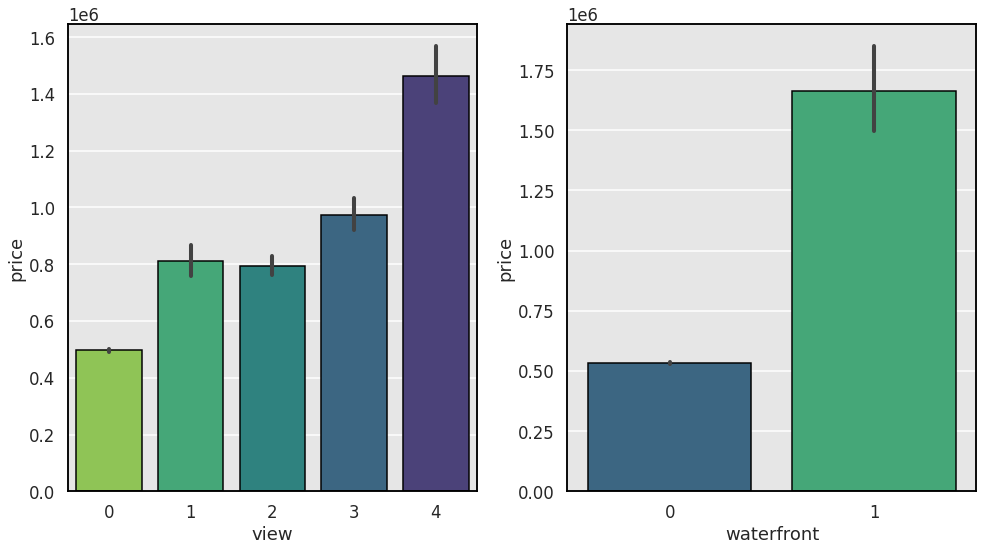

In [ ]:
# Plotting the view and waterfront features against mean prices of the Houses.

fig, ax = plt.subplots(1,2, figsize=(14,8))

sns.barplot(x="view", y='price', data=df_kc, palette='viridis_r', ec='k', ax = ax[0])
sns.barplot(x="waterfront", y='price', data=df_kc, palette='viridis', ec='k', ax = ax[1])
plt.tight_layout()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Here, the plots of views and waterfronts against the mean price suggest a clear upward trend. Higher quality of view indicate a increase in the mean price, while having a waterfront for the House, drastically increases the price of a House.** 

Text(0.5, 1.0, 'Regplot for Area of living space for 15 neighbors vs. Price')

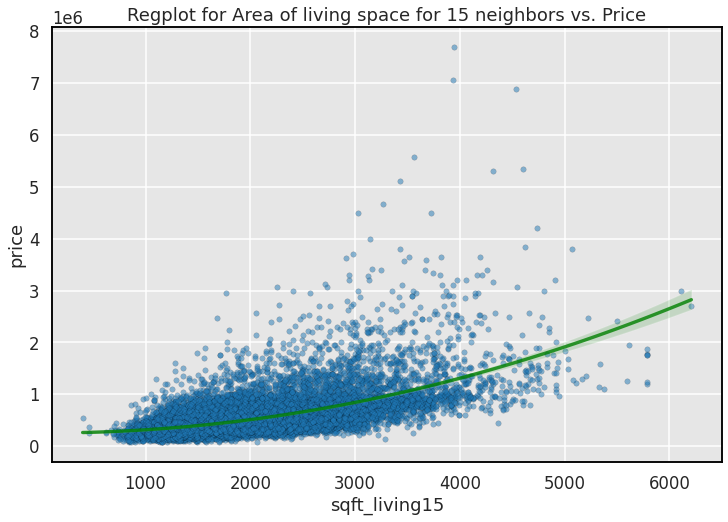

In [ ]:
# Making a regplot for sqft_living15 against the price.

plt.figure(figsize=(12,8))
sns.regplot(x="sqft_living15", y='price', data=df_kc, order=2, scatter_kws = {'s':30, 'alpha':0.5, 'ec':'k', 'lw':0.2},line_kws={'color':'g','alpha':0.8})
plt.title("Regplot for Area of living space for 15 neighbors vs. Price")

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**A regression plot for prices against the feature of areas of living space for 15 neighbors suggests a somewhat non-linear upward relationship, showing that the House price can also be affected by the size of the houses in the neighboring areas.**

## Standardizing the data

In this section, we will first remove any predictor variables that do not provide any useful relation with the prices. We would then plot the correlation among the remaining variables to look for features which highly correlate with other features and might not be as useful for the modelling. Removing such features will also help us somewhat to reduce the dimensionality of the problem.

In [ ]:
# Selecting the predictors and response variables and leaving out unnecessary predictors.

X = df_kc.drop(['id', 'date', 'price', 'zipcode'], axis=1)
y = df_kc[['price']]

print(X.shape,y.shape)

(21613, 17) (21613, 1)


[Text(0.5, 0, 'bedrooms'),
 Text(1.5, 0, 'bathrooms'),
 Text(2.5, 0, 'sqft_living'),
 Text(3.5, 0, 'sqft_lot'),
 Text(4.5, 0, 'floors'),
 Text(5.5, 0, 'waterfront'),
 Text(6.5, 0, 'view'),
 Text(7.5, 0, 'condition'),
 Text(8.5, 0, 'grade'),
 Text(9.5, 0, 'sqft_above'),
 Text(10.5, 0, 'sqft_basement'),
 Text(11.5, 0, 'yr_built'),
 Text(12.5, 0, 'yr_renovated'),
 Text(13.5, 0, 'lat'),
 Text(14.5, 0, 'long'),
 Text(15.5, 0, 'sqft_living15'),
 Text(16.5, 0, 'sqft_lot15')]

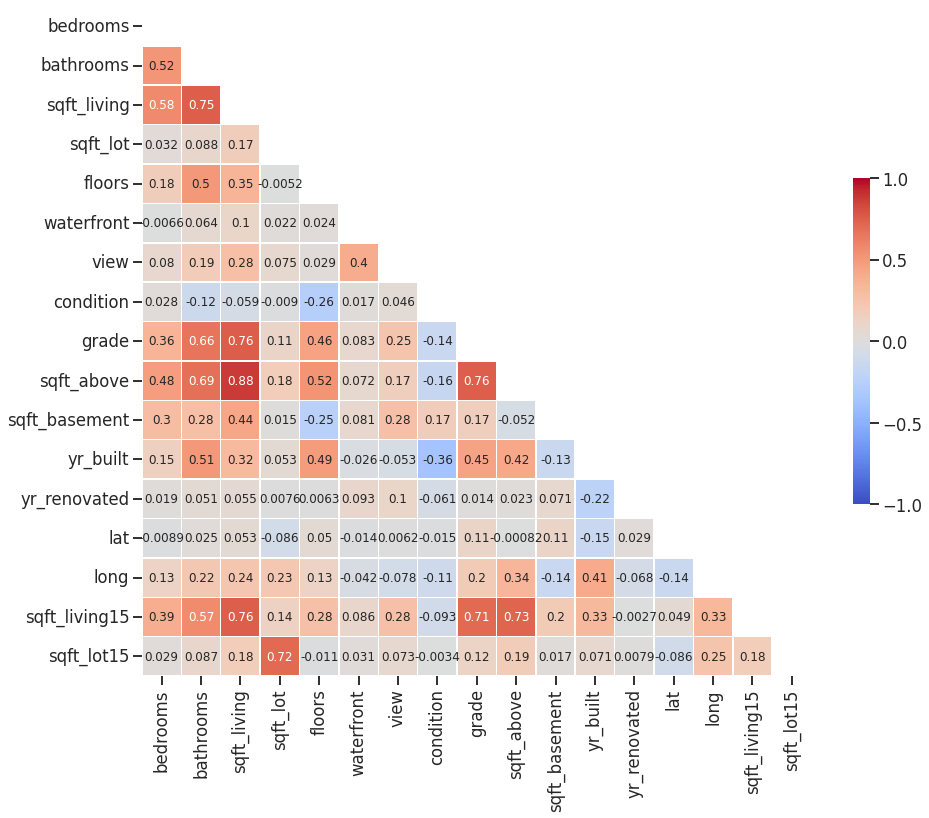

In [ ]:
corr_matrix = X.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


sns.set_style("ticks")
f, ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)


In [ ]:
# Removing features having high correlation with other predictors.
    
X = X.drop(['sqft_above'], axis=1)

print(X.shape,y.shape)

(21613, 16) (21613, 1)


In [ ]:
col = list(X.columns)

# Scaling the features in our dataset.

scale = StandardScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y)

X = pd.DataFrame(X, columns = col)
y = pd.DataFrame(y, columns = ['price'])

print(X.shape, y.shape)

(21613, 16) (21613, 1)


### Train-Test Split of the Dataset

In [ ]:
# Splitting the data into train and test sets with train size of 70%.

x_train, x_test, y_train, y_test  =  train_test_split(X, y , train_size=0.70, random_state = 103)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(15129, 16) (6484, 16)
(15129, 1) (6484, 1)


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

# Part B : Applying Regression Techniques to Predict House Prices

* In this part, we start with building a simple linear regression model and compute the errors and R-squared on it. We then try to improve the performance using Lasso and Ridge regularisations.

* We make residual plots to access the assumption of linearity and subsequently build a polynomial regression model.

* kNN regression was then applied, after tuning the hyperparameter k.

* Then, we moved onto Decision Trees and ensemble methods such as Bagging, Random Forest and Boosting to further improve on the results from previous models.

### 1. Fitting a Model - Linear Regression

In [ ]:
# Building a simple linear regression model initially.

model = LinearRegression()

model.fit(x_train, y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Computing the train and test MSE values.

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}')


MSE for training data 0.2925
MSE for testing data 0.3351


In [ ]:
# Also calculating the R-squared values.

r2score_train  = r2_score(y_train, ypred_train)
r2score_test = r2_score(y_test, ypred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

R2 score for training data 0.6959
R2 score for testing data 0.6923


### 1.1 Improving Model Accuracies by imposing Lasso and Ridge

In [ ]:
alpha_list = [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000]

ridge_score = []
lasso_score = []


for alpha in alpha_list:
    
    ridge_mod = Ridge(alpha=alpha)
    las_mod = Lasso(alpha=alpha)
    
    crossval_ridge = cross_validate(ridge_mod, X, y, scoring='neg_mean_squared_error', cv=5)
    crossval_las = cross_validate(las_mod, X, y, scoring='neg_mean_squared_error', cv=5)
    
    ridge_val = np.mean(abs(crossval_ridge['test_score']))
    las_val = np.mean(abs(crossval_las['test_score']))
    
    ridge_score.append(ridge_val)
    lasso_score.append(las_val)
    
alpha_ridge = alpha_list[np.argmin(ridge_score)]
alpha_las = alpha_list[np.argmin(lasso_score)]
    

In [ ]:
print(f"The Best alpha value for Ridge Regulariser is {alpha_ridge} ")
print(f"The Best alpha value for Lasso Regulariser is {alpha_las}")

The Best alpha value for Ridge Regulariser is 100 
The Best alpha value for Lasso Regulariser is 0.001


### 1.2 Ridge and Lasso Paths

In [ ]:
# Building a linear reg model with lasso regularisation with the best chosen alpha.

model_las = Lasso(alpha=alpha_las)

model_las.fit(x_train, y_train)

ypred_train = model_las.predict(x_train)
ypred_test = model_las.predict(x_test)

# Computing the train and test MSE values as well as the R-squared value.

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

r2score_train  = r2_score(y_train, ypred_train)
r2score_test = r2_score(y_test, ypred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

MSE for training data 0.2925
MSE for testing data 0.3352

R2 score for training data 0.6959
R2 score for testing data 0.6922


In [ ]:
# Building a linear reg model with ridge regularisation with the best chosen alpha.

model_ridge = Ridge(alpha=alpha_ridge)

model_ridge.fit(x_train, y_train)

ypred_train = model_ridge.predict(x_train)
ypred_test = model_ridge.predict(x_test)

# Computing the train and test MSE values as well as the R-squared value.

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

r2score_train  = r2_score(y_train, ypred_train)
r2score_test = r2_score(y_test, ypred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')


MSE for training data 0.2925
MSE for testing data 0.3353

R2 score for training data 0.6959
R2 score for testing data 0.6920


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inferences:

* The simple linear regression model built, gave somewhat average results with a R-squared value of approx. 0.7.

* We then implemented Lasso and Ridge regularisation on the linear model, but it had almost no noticable effect on the MSE and R-squared values.


## 1.3 Residual Plot

Text(0.5, 1.0, 'Plot of  Residuals for the Linear Regression Model')

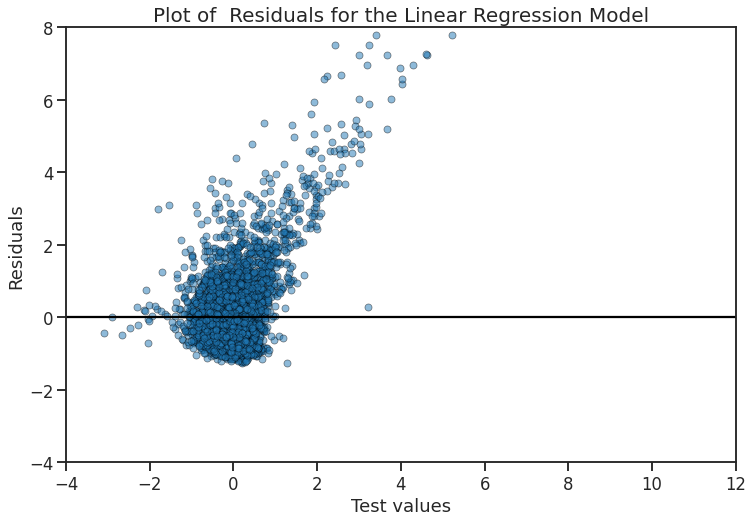

In [ ]:
# Plotting the residuals for the linear model against the test values.

Ridge_residuals = y_test - ypred_test

plt.figure(figsize=(12,8))
plt.scatter(Ridge_residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')

plt.ylim(-4,8)
plt.xlim(-4,12)
plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Linear Regression Model", size=20)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inferences:

* The residual plot for linear regression did not have a uniform random distribution of points across the origin, which meant that the assumption for linearity was not completely valid. Thus we moved on to the polynomial regression

## 2. Polynomial Regression

### 2.1 Finding the best degree

In [ ]:
# Initialising the degree variable to check for various degree polynomials.

degree = np.arange(1, 4, 1)

val_mse = []

for d in degree:
    
    # Computing the polynomial features for the predictor variable.
    
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    
    # Applying cross validation to the linear model on the polynomial features data.
    
    model_poly = LinearRegression(fit_intercept=False)
    
    cross_val = cross_validate(model_poly, x_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculating the mean train and validation MSE and adding them to the list.
    
    mean_mse = np.mean(abs(cross_val['test_score']))
    
    val_mse.append(mean_mse)
    
# Finding the best degree with least validation error.
    
best_degree =  np.argmin(val_mse)+1   
print(f"The Best Degree for the model is {best_degree}")

The Best Degree for the model is 2


In [ ]:
# Calculating the polynomial features with the best degree obtained.

x_poly_train = PolynomialFeatures(best_degree).fit_transform(x_train)
x_poly_test = PolynomialFeatures(best_degree).fit_transform(x_test)

# Fitting the data to a multiple polynomial regression model.

model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_poly_train, y_train)

y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

# Calculating the test and train MSE for the fitted model.

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

# Also finding the R-squared value for test and train data.

r2score_train  = r2_score(y_train, y_pred_train)
r2score_test = r2_score(y_test, y_pred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

MSE for training data 0.1813
MSE for testing data 0.2070

R2 score for training data 0.8115
R2 score for testing data 0.8099


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inferences:

* The best degree obtained for the polynomial regression was 2. Testing the model for higher degrees was computationally expensive and also the errors were substantial.

* Polynomial model was a great improvement on previous models, as the MSE was lowered significantly by almost 1/3rd amount and the R-squared for test data increased upto approx. 0.81.

## 2.2 Residual Plot

Text(0.5, 1.0, 'Plot of  Residuals for the Polynomial Regression Model')

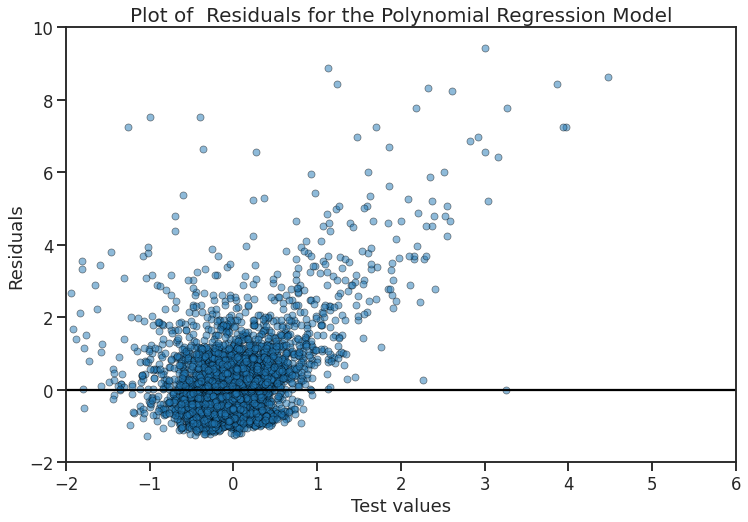

In [ ]:
# Again plotting the residuals for the polynomial model.

Poly_residuals = y_test - y_pred_test

plt.figure(figsize=(12,8))
plt.scatter(Poly_residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')
plt.ylim(-2, 10)
plt.xlim(-2, 6)

plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Polynomial Regression Model", size=20)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inference:

* A residual plot for the polynomial model showed a comparitively more random distribution than last time but it wasnt uniformly distributed. This could be due to still some non-linear features in the data which the model doesnt account for properly.

## 3. kNN Regression

### 3.1 Tuning the Hyperparameter k for kNN regression

In [ ]:
# Initialising the k-list variable to check for various k values.

k_list = np.arange(1, 16, 1)

knn_mse = []

for k in k_list:
    
    # Applying cross validation to the knn model with different k-values 
    
    knn_mod = KNeighborsRegressor(n_neighbors=k)
    
    crossval_knn = cross_validate(knn_mod, X, y, cv=10, scoring='neg_mean_squared_error')
    
    # Calculating the mean train and validation MSE and adding them to the list.
    
    mean_knn_mse = np.mean(abs(crossval_knn['test_score']))
    
    knn_mse.append(mean_knn_mse)

# Finding the best k with least validation error.
    
best_kvalue = np.argmin(knn_mse)+1

print(f"The Best value for Hyperparameter k for the model is {best_kvalue}")

The Best value for Hyperparameter k for the model is 6


Text(0.5, 1.0, 'Variation in Test MSE with k-values')

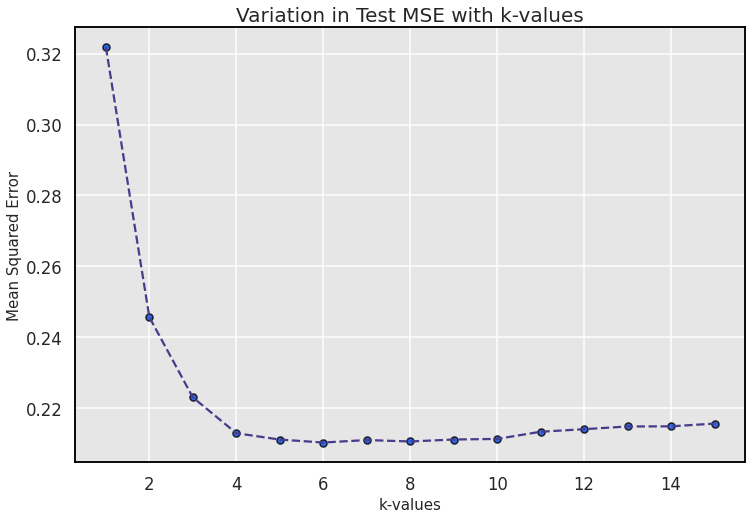

In [ ]:
# Plotting the variation in test error over the k-values.

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
plt.rcParams['axes.edgecolor'] = 'black'
plt.figure(figsize=(12,8))
plt.scatter(k_list, knn_mse, marker='o', color='xkcd:blue', ec='k', alpha=0.8, s=50)
plt.plot(k_list, knn_mse, ls='--', color='darkslateblue')

plt.xlabel("k-values", size=15)
plt.ylabel("Mean Squared Error", size=15)
plt.title("Variation in Test MSE with k-values", size=20)

In [ ]:
# Building the knn model with the best k-value.

knn_mod = KNeighborsRegressor(n_neighbors=best_kvalue)

knn_mod.fit(x_train, y_train)

ypred_knntest = knn_mod.predict(x_test)
ypred_knntrain = knn_mod.predict(x_train)

# Finding the train and test MSE and the R-squared values.

mse_train = mean_squared_error(y_train, ypred_knntrain)
mse_test = mean_squared_error(y_test, ypred_knntest)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

r2score_train  = r2_score(y_train, ypred_knntrain)
r2score_test = r2_score(y_test, ypred_knntest)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

MSE for training data 0.1456
MSE for testing data 0.2464

R2 score for training data 0.8486
R2 score for testing data 0.7738


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inferences:

* The kNN model was built with the best hyperparameter k=6, which was found via cross-validation over the entire data.

* Model had a higher R-squared value over training data compared to polynomial model but a lower R-squared on test data, which suggested that it was somewhat overfitting on the training data.

## 4. Decision Tree Regression

### 4.1 Finding the Best Depth and other pruning parameters.

In [ ]:
# finding the best max depth for the regression tree.

max_depth = np.arange(1, 21, 1)

dtree_regmse = []

for d in max_depth:
    
    dtree = DecisionTreeRegressor(max_depth=d, random_state=20)
    
    crossval_tree = cross_validate(dtree, X, y, cv=10, scoring='neg_mean_squared_error')
    
    mean_tree_acc = np.mean(abs(crossval_tree['test_score']))
    
    dtree_regmse.append(mean_tree_acc)
    
best_depth = max_depth[np.argmin(dtree_regmse)]

print(f"The Best Depth for the model is {best_depth} ")

The Best Depth for the model is 11 


Text(0.5, 1.0, 'Variation in Test MSE with Depth of the Tree')

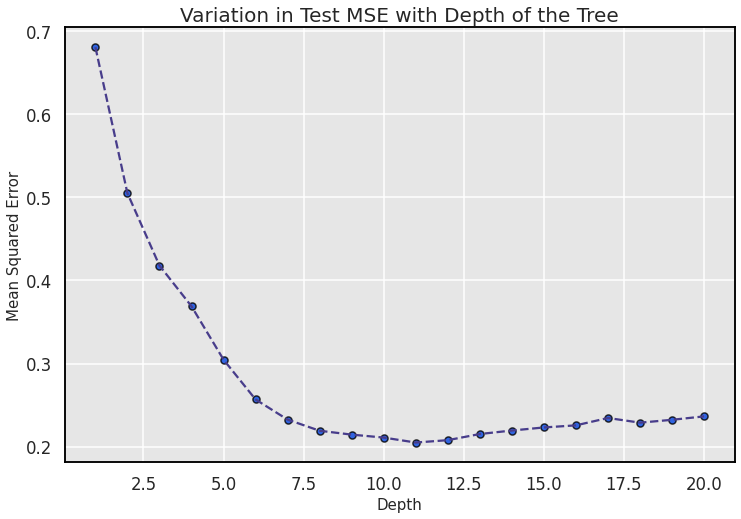

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(max_depth, dtree_regmse, marker='o', color='xkcd:blue', ec='k', alpha=0.8, s=50)
plt.plot(max_depth, dtree_regmse, ls='--', color='darkslateblue')

plt.xlabel("Depth", size=15)
plt.ylabel("Mean Squared Error", size=15)
plt.title("Variation in Test MSE with Depth of the Tree", size=20)

In [ ]:
# Doing Grid search cross-validation to find the best parameters.

reg_tree = DecisionTreeRegressor(max_depth=best_depth, random_state=20)

params = {'min_samples_split' : [5, 10, 20, 40, 60],
         'min_samples_leaf' : [3, 5, 10, 20, 50],
         'min_impurity_decrease' : [0.0001, 1e-5] }

clf = GridSearchCV(reg_tree, params, cv=5)
clf.fit(x_train, y_train)
print(clf.best_estimator_)

DecisionTreeRegressor(max_depth=11, min_impurity_decrease=1e-05,
                      min_samples_leaf=10, min_samples_split=5,
                      random_state=20)


In [ ]:
# Building the decision tree with the best estimator parameters above.

regtree_best = DecisionTreeRegressor(max_depth=best_depth, random_state=20, min_impurity_decrease=1e-5, min_samples_leaf=10,
                                       min_samples_split=5)

regtree_best.fit(x_train, y_train)

y_pred_regtree = regtree_best.predict(x_test)

tree_mse = mean_squared_error(y_test, y_pred_regtree)
tree_score = r2_score(y_test, y_pred_regtree)

print(f"The Test MSE for Decision Tree regressor is : {tree_mse:.4f} ")
print(f'R2 score for Decision Tree regressor is : {tree_score:.4f}')

The Test MSE for Decision Tree regressor is : 0.2115 
R2 score for Decision Tree regressor is : 0.8058


In [ ]:
# Visualising the tree and saving it to a file.
reg_tree = StringIO()

# The decision tree is plotted as a graph and exported to a dot file using pydot.

tree.export_graphviz(regtree_best, out_file = reg_tree, feature_names=x_train.columns, filled=True)
graph, = pydot.graph_from_dot_data(reg_tree.getvalue())
Image(graph.create_png())

# The png image file was saved and uploaded in the files section under images folder.

Output hidden; open in https://colab.research.google.com to view.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inferences:

* Best depth for the decision tree was found to be 11 using cross-validation. Other parameters were tuned using grid search CV to prune the tree and avoid overfitting.

* The model performed almost equally as good as the polynomial model, but a great advantage is provided in terms of interpretation as we can visualise the tree.

## 5. Bagging Regression

### 5.1 Finding the best n_estimators for Bagging regressor

In [ ]:
# Decision Tree with Bagging, select a basemodel.

basemodel = DecisionTreeRegressor(max_depth=best_depth, random_state=20, min_impurity_decrease=1e-5,
                                     min_samples_leaf=10, min_samples_split=5)

mse_scores=[]

for i in range(1,51):

    # Building the bagging model by taking the decision tree above as base model.

    model = BaggingRegressor(base_estimator = basemodel, n_estimators=i)                       

    # Fit the model on the train data and predicting on test data
    model.fit(x_train,y_train)
    y_pred_all = model.predict(x_test)

    test_MSE_all = mean_squared_error(y_test, y_pred_all)
    mse_scores.append(test_MSE_all)

In [ ]:
best_nestimator = np.argmin(mse_scores)+1

print(f"The Best no. of estimators for Bagging regressor is : {best_nestimator}")

The Best no. of estimators for Bagging regressor is : 43


Text(0.5, 1.0, 'Variation in Test MSE with No. of Estimators')

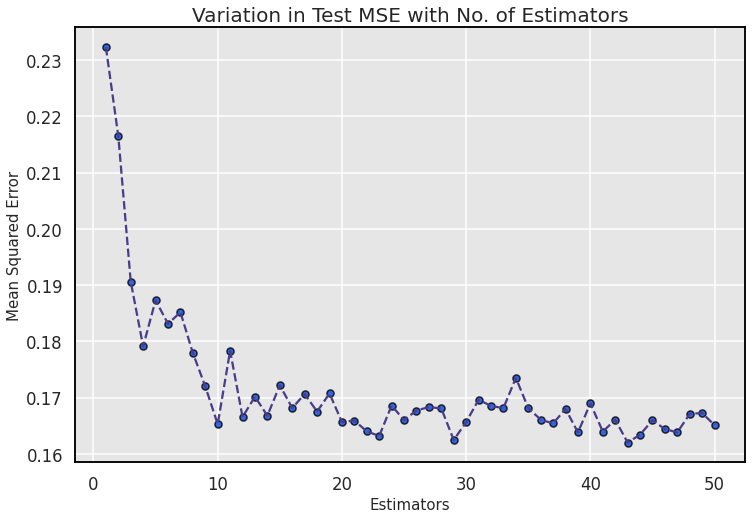

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(1,51,1), mse_scores, marker='o', color='xkcd:blue', ec='k', alpha=0.8, s=50)
plt.plot(np.arange(1,51,1), mse_scores, ls='--', color='darkslateblue')

plt.xlabel("Estimators", size=15)
plt.ylabel("Mean Squared Error", size=15)
plt.title("Variation in Test MSE with No. of Estimators", size=20)

In [ ]:
# Now Fitting the model with best no. of estimators for bagging.

bag_mod = BaggingRegressor(base_estimator = basemodel, n_estimators=best_nestimator)
bag_mod.fit(x_train, y_train)

y_pred_bag = bag_mod.predict(x_test)

bag_mse = mean_squared_error(y_test, y_pred_bag)
bag_score = r2_score(y_test, y_pred_bag)

print(f"The Test MSE for Bagging regressor is : {bag_mse:.4f} ")
print(f'R2 score for Bagging regressor is : {bag_score:.4f}')

The Test MSE for Bagging regressor is : 0.1649 
R2 score for Bagging regressor is : 0.8486


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inference:

* Bagging was implemented using the previous tree as the base model and the best value for n_estimators was tuned. The variation plot showed an initial dip in MSE continued by gradual improvements for estimators>10.

* Bagging Model performed the best among the models up till now with an R-squared value >0.85.

## 6. Random Forest Regression 

In [ ]:
# Finding out the best number of estimators for Random Forest Algorithm.

estimators = np.arange(100, 501, 1)

# Initialising the model with appropriate parameters.

rf = RandomForestRegressor(warm_start=True, min_samples_leaf=10, min_samples_split=5,
                               oob_score=True, max_depth = best_depth, random_state=20,
                                max_features ='sqrt')

error_rate = []

# Setting different values of n_estimtors to the model.

for i in estimators:
    
    rf.set_params(n_estimators=i)
    rf.fit(x_train, y_train)
    
    # Storing the Out-of-bag error on a list.

    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)

# Finding the best n_estimator with minimum OOB error.

best_estimator = estimators[np.argmin(error_rate)]
    
print(f"The best no. of estimators for the Random Forest Model are :  {best_estimator} ") 

The best no. of estimators for the Random Forest Model are :  107 


Text(0.5, 1.0, 'The OOB error for Random Forest Models at different n_estimators')

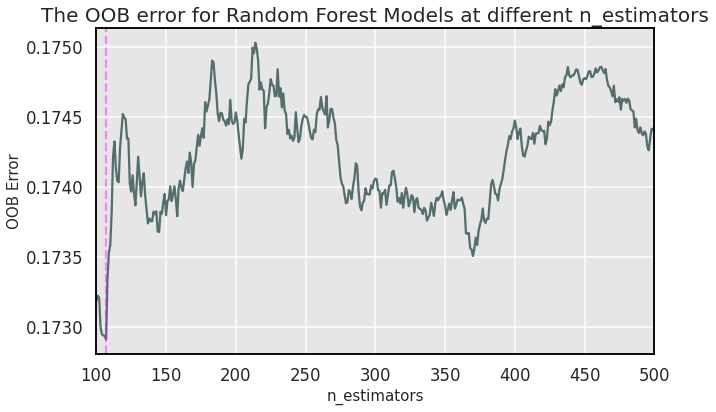

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(estimators, error_rate, color='darkslategrey', alpha=0.8)
plt.axvline(x=best_estimator, ls= '--', color='magenta', alpha=0.4)

plt.xlim(100, 500)
plt.xlabel("n_estimators", size=15)
plt.ylabel("OOB Error", size=15)
plt.title("The OOB error for Random Forest Models at different n_estimators", size=20)

In [ ]:
# Building the Random forest model with no. of estimators selected above and max_features set as square root of total features.

rf = RandomForestRegressor(n_estimators=best_estimator, min_samples_leaf=10, min_samples_split=5,
                            max_features='sqrt', max_depth = best_depth, random_state=20)

rf.fit(x_train, y_train)

y_pred_regforest = rf.predict(x_test)

# Calculating the MSE and r-squared of the model.

rf_mse = mean_squared_error(y_test, y_pred_regforest)
rf_score =r2_score(y_test, y_pred_regforest)

print(f"The Test MSE for Random Forest Regressor is : {rf_mse:.4f} ")
print(f"The R-squared value for Random Forest Regressor is : {rf_score:.4f} ")



The Test MSE for Random Forest Regressor is : 0.1864 
The R-squared value for Random Forest Regressor is : 0.8289 


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inferences:

* Once again, the no. of. estimators were tuned for Random forest using the OOB error rate and the variation was plotted.

* The Model showed significant improvement on the base model of original Decision Tree but was less efficient compared to the bagging model. It had a R-squared value of approx. 0.83.

## 7. Gradient Boost Regression

In [ ]:
%%time
# Set a learning rate

boost_MSE=[]
l_rate = 0.2
num_of_estimators = np.arange(500,1500,100)

for i in num_of_estimators:
    
    # Initialised a Boosting model with given learning_rate 
    
    boosted_model  = GradientBoostingRegressor(learning_rate=l_rate, n_estimators=i, max_depth=1,random_state=20)

    # Fit on the train data
    boosted_model.fit(x_train,y_train)

    # Predict on the test data
    y_pred = boosted_model.predict(x_test)
    
    # Compute the MSE of the Boosting model prediction on the test data and store in a list
    
    boost_mse = mean_squared_error(y_pred,y_test)
    boost_MSE.append(boost_mse)    


# find the best n_estimators with minimum MSE.

best_est = num_of_estimators[np.argmin(boost_MSE)]
print(f"The Best n_estimator for the Boosting model is {best_est}")

The Best n_estimator for the Boosting model is 1200
CPU times: user 1min 44s, sys: 127 ms, total: 1min 44s
Wall time: 1min 54s


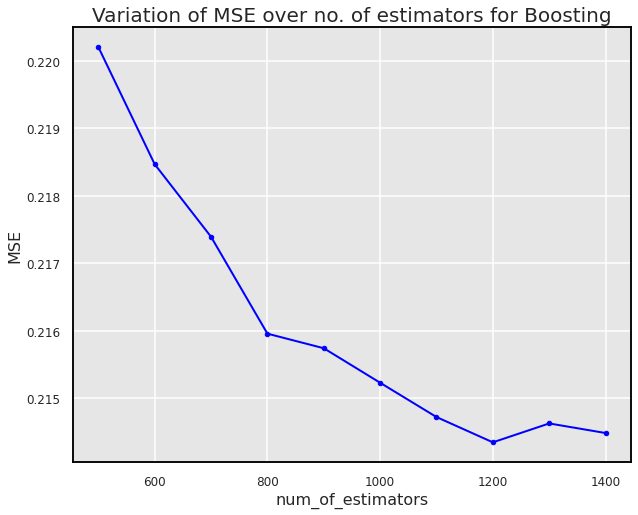

In [ ]:
# Plotting variation of mse values.

plt.figure(figsize=(10,8))
xrange = np.arange(500,1500,100)
plt.plot(xrange, boost_MSE ,'b.-', linewidth=2)

plt.xlabel("num_of_estimators", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.title("Variation of MSE over no. of estimators for Boosting", size=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Fitting the Gradient Boosting model with best n_estimators.

boosted_model  = GradientBoostingRegressor(learning_rate=l_rate, n_estimators=best_est, random_state=20)

# Fit on the train data
boosted_model.fit(x_train,y_train)

# Predict on the test data
y_pred_boost = boosted_model.predict(x_test)

boost_mse=mean_squared_error(y_test,y_pred_boost)
boost_score = r2_score(y_test, y_pred_boost)

print(f"The MSE of the Boosting model is {boost_mse:.4f}")
print(f"The R-squared of the Boosting model is {boost_score:.4f}") 

The MSE of the Boosting model is 0.1170
The R-squared of the Boosting model is 0.8926


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### Inferences:

* The Boosting model's best learning rate was found to be 0.2 and the best n_estimators as 1200.

* The Model outperformed all the previous models, giving a huge improvement in R-squared value over bagging and same with MSE. Its R-squared score came out to be >0.89.


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

# Part C : Classifying the House prices on the basis of affordability

### Assigning a threshold value in price column to make it binary (Expensive / Affordable)    
    
Inorder to transform the regression problem at hand into a classification one, we wanted to convert the price feature into a categorical variable. This was to be done in such a manner that the threshold chosen isn't inherent in our dataset, which would then mean the model would learn the specific pattern at hand and the solution would not be worthwhile.

To tackle this, we chose to select an average metric for the whole State of Washington, which will incorporate the variation of House prices in and around King County, thus being somewhat independent of the dataset. According to the Office of Financial Management in State of Washington, the median House price for the year 2015 (Data in King County House prices range from May 2014 to May 2015) was: 

#### Washington State Median House price in 2015 : $ 289,100 

#### Source : https://ofm.wa.gov/washington-data-research/statewide-data/washington-trends/economic-trends/median-home-price

## 1. Logistic Regression 

In [ ]:
# Defining our response variable Affordability on the basis of Median house prices in State of Washington.
# We label the affordable house prices as 1, and the expensive ones as 0.

for i in df_kc[df_kc['price']<=289100].index:
    
    df_kc.loc[i, 'Affordability'] = 1
    
    
df_kc['Affordability'].fillna(0, inplace=True)

In [ ]:
# Displaying the amount of values in each binary class.

df_kc['Affordability'].value_counts()

0.0    17630
1.0     3983
Name: Affordability, dtype: int64

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


* Here we see, that after applying our chosen metric, there is a class imbalance in our response variable. We can tackle this further by using balanced class weights or upsampling techniques and compare them with imbalanced models.

In [ ]:
# Assigning the predictor and response variables and splitting the dataset.

X = df_kc.drop(['id', 'date', 'price', 'zipcode', 'long', 'Affordability'], axis = 1)
Y = df_kc['Affordability']

# Scaling our feature space using standard scaler.

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.7, random_state=103)


## 1.1 Tuning the Regularisation parameter

In [ ]:
# Initialising the C-list variable to check for various regularisation values.

C_list = [0.1, 1, 10, 100, 1000, 1e4, 1e5]

validation_Acc = []

for val in C_list:
    
    # Applying cross validation to the logistic regression model with different C-values.
    
    log_mod = LogisticRegression(max_iter=10000, C=val)
    
    crossval_log = cross_validate(log_mod, X_scaled, Y, cv=10, scoring='accuracy')
    
    # Calculating the mean validation accuracy and adding them to the list.
    
    mean_acc = np.mean(crossval_log['test_score'])
    validation_Acc.append(mean_acc)

# Finding the best regularisation value with maximum validation accuracy.
    
best_c = C_list[np.argmax(validation_Acc)]

print(f"The best value for Regularisation parameter C is : {best_c} ")

The best value for Regularisation parameter C is : 0.1 


In [ ]:
# Building the model with the best regularisation parameter C.

log_best =  LogisticRegression(max_iter=10000, C=best_c)
log_best.fit(X_train, y_train)

y_pred_log = log_best.predict(X_test)

# Calculating the accuracy of the regularised model.

log_bestacc = accuracy_score(y_test, y_pred_log)

print(f"The accuracy for Basic Logistic model is : {log_bestacc*100:.4f} %")

The accuracy for Basic Logistic model is : 91.3325 %


[Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')]

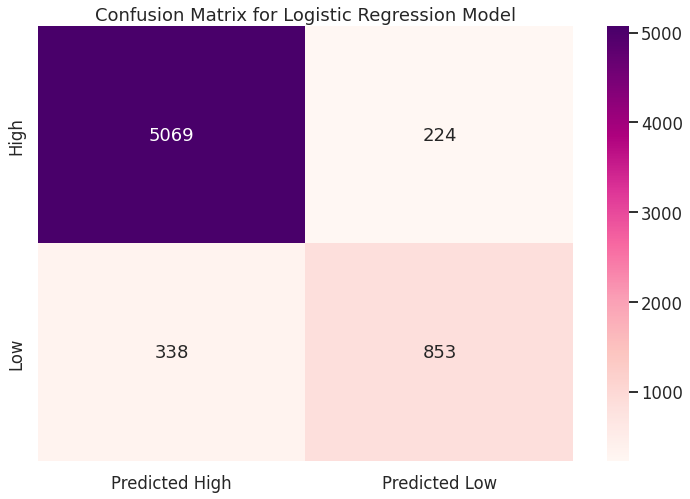

In [ ]:
# Plotting a confusion matrix for the Initial Model. High here represents the class 0 i.e. Expensive price, while low represents 
# 1 or the Affordable price.

cm_log = confusion_matrix(y_test, y_pred_log)
df_cm_log = pd.DataFrame(cm_log, index = ['High', 'Low'], columns = ['Predicted High','Predicted Low'])

plt.figure(figsize=(12,8))
sns.heatmap(df_cm_log, annot=True, fmt='g', cmap='RdPu').set(title='Confusion Matrix for Logistic Regression Model')

In [ ]:
# Displaying an overall classification report for the model.

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      5293
         1.0       0.79      0.72      0.75      1191

    accuracy                           0.91      6484
   macro avg       0.86      0.84      0.85      6484
weighted avg       0.91      0.91      0.91      6484



<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
* The best regularisation value C was found to be 0.1 and the overall accuracy as approx. 91 %.<br /><br />
    
* In the regularised Logistic model, we see a high accuracy metric but this overshadows the fact that there is an imbalance in the classes, leaning heavily on the side of class 0 (Expensive). This is why we see high accuracy for that class and a great number of true negatives (0, Expensive).

# 2. kNN Classification

In [ ]:
# Initialising the k-list variable to check for various k values.

k_list = np.arange(1, 25, 1)

knn_acc = []

for k in k_list:
    
    # Applying cross validation to the kNN model with different k-values.

    knn_class = KNeighborsClassifier(n_neighbors=k)
    
    crossval_knn = cross_validate(knn_class, X_scaled, Y, cv=10, scoring='accuracy')
    
    # Finding the mean validation Accuracy and storing it in a list.

    mean_knn_acc = np.mean(abs(crossval_knn['test_score']))
    
    knn_acc.append(mean_knn_acc)

# Finding the best k value.

best_kvalue = k_list[np.argmax(knn_acc)]

print(f"The Best value for Hyperparameter k for the model is {best_kvalue} ")

The Best value for Hyperparameter k for the model is 15 


Text(0.5, 1.0, 'Variation in Validation Accuracy with k-values')

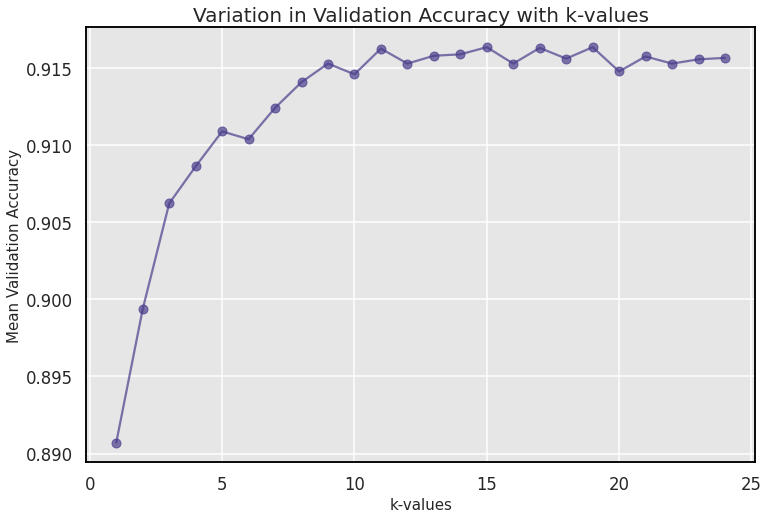

In [ ]:
# plotting variation in Validation Accuracy with k-values

plt.figure(figsize=(12,8))
plt.plot(k_list, knn_acc, 'o-', color='darkslateblue', alpha=0.7)

plt.xlabel("k-values", size=15)
plt.ylabel("Mean Validation Accuracy", size=15)
plt.title("Variation in Validation Accuracy with k-values", size=20)

In [ ]:
# Now building the kNN model with the best k value.

knn_best = KNeighborsClassifier(n_neighbors=best_kvalue)

knn_best.fit(X_train, y_train)

ypred_knntest = knn_best.predict(X_test)
ypred_knntrain = knn_best.predict(X_train)

knn_acc_test = accuracy_score(y_test, ypred_knntest)
knn_acc_train = accuracy_score(y_train, ypred_knntrain)

print(f"The Test accuracy for kNN Classification model is : {knn_acc_test*100:.4f} %")
print(f"The Train accuracy for kNN Classification model is : {knn_acc_train*100:.4f} %")

The Test accuracy for kNN Classification model is : 91.2554 %
The Train accuracy for kNN Classification model is : 92.5177 %


[Text(0.5, 1.0, 'Confusion Matrix for kNN Classification Model')]

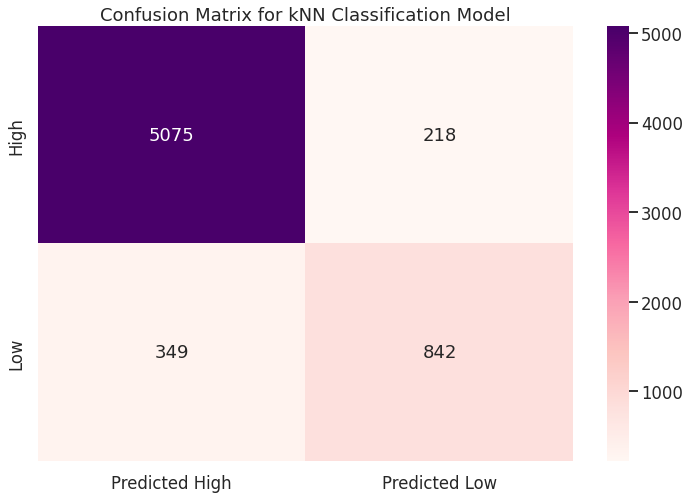

In [ ]:
# Plotting a confusion matrix for the kNN classification Model.

cm_log = confusion_matrix(y_test, ypred_knntest)
df_cm_log = pd.DataFrame(cm_log, index = ['High', 'Low'], columns = ['Predicted High','Predicted Low'])

plt.figure(figsize=(12,8))
sns.heatmap(df_cm_log, annot=True, fmt='g', cmap='RdPu').set(title='Confusion Matrix for kNN Classification Model')

In [ ]:
# Displaying an overall classification report for the model.

print(classification_report(y_test, ypred_knntest))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      5293
         1.0       0.79      0.71      0.75      1191

    accuracy                           0.91      6484
   macro avg       0.86      0.83      0.85      6484
weighted avg       0.91      0.91      0.91      6484



<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
* For kNN classification, the Best value for Hyperparameter k was found to be 15 and there was fluctuation in a limited range of accuracy for subsequent k-values.<br /><br />

* In terms of overall accuracy, the kNN model performs similar to the logistic one, but the model predits lesser number of Affordable Houses correctly, thus has a slightly lower recall for class 1, which is undesirable for the problem we want to solve using this model.

## 3. Decision Tree Classifier

In [ ]:
max_depth = np.arange(1, 21, 1)

dtree_acc = []

for d in max_depth:
    
    dtree = DecisionTreeClassifier(max_depth=d, random_state=20, class_weight="balanced")
    
    crossval_tree = cross_validate(dtree, X_scaled, Y, cv=10, scoring='accuracy')
    
    mean_tree_acc = np.mean(crossval_tree['test_score'])
    
    dtree_acc.append(mean_tree_acc)
    
best_depth = max_depth[np.argmax(dtree_acc)]

print(f"The Best Depth for the model is {best_depth} ")

The Best Depth for the model is 15 


Text(0.5, 1.0, 'Variation in Validation Accuracy with Tree Depths')

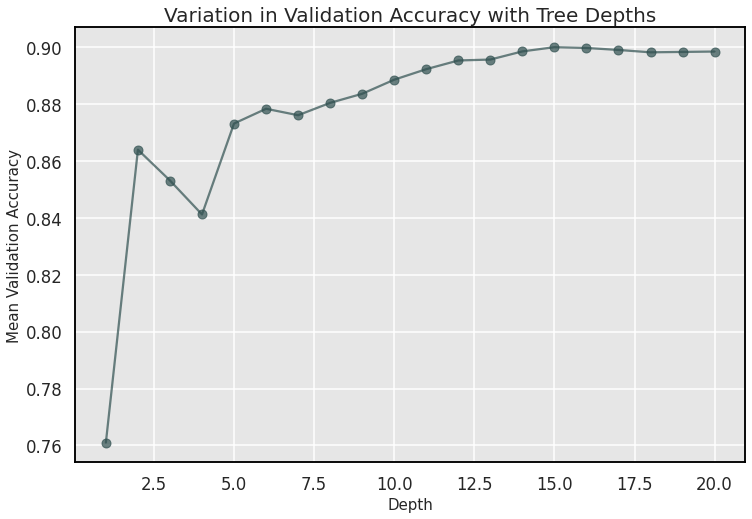

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(max_depth, dtree_acc, 'o-', color='darkslategrey', alpha=0.7)

plt.xlabel("Depth", size=15)
plt.ylabel("Mean Validation Accuracy", size=15)
plt.title("Variation in Validation Accuracy with Tree Depths", size=20)

In [ ]:
dtree = DecisionTreeClassifier(max_depth=15, random_state=20, class_weight="balanced")

params = {'min_samples_split' : [5, 10, 20, 40, 60],
         'min_samples_leaf' : [10, 20, 50, 100],
         'min_impurity_decrease' : [0.0001, 1e-5] }

clf = GridSearchCV(dtree, params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=15, random_state=20),
             param_grid={'min_impurity_decrease': [0.0001, 1e-05],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'min_samples_split': [5, 10, 20, 40, 60]},
             scoring='accuracy')

In [ ]:
print(f"The parameters for Best estimator are : {clf.best_estimator_}\n")

The parameters for Best estimator are : DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=20,
                       min_samples_split=60, random_state=20)



In [ ]:
dtree_best = DecisionTreeClassifier(max_depth=15, random_state=20, min_impurity_decrease=0.0001, min_samples_leaf=20,
                       min_samples_split=60, class_weight="balanced")

dtree_best.fit(X_train, y_train)

y_pred_tree = dtree_best.predict(X_test)

tree_acc = accuracy_score(y_test, y_pred_tree)
print(f"The Test accuracy for Decision Tree classifier is : {tree_acc*100:.4f} %")

The Test accuracy for Decision Tree classifier is : 87.9395 %


[Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')]

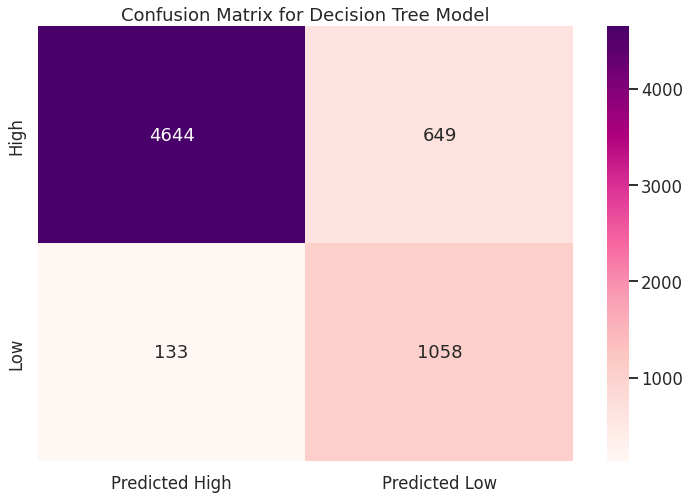

In [ ]:
# Plotting a confusion matrix for the Decision Tree Model.

cm_tree = confusion_matrix(y_test, y_pred_tree)
df_cm_tree = pd.DataFrame(cm_tree, index = ['High', 'Low'], columns = ['Predicted High','Predicted Low'])

plt.figure(figsize=(12,8))
sns.heatmap(df_cm_tree, annot=True, fmt='g', cmap='RdPu').set(title='Confusion Matrix for Decision Tree Model')

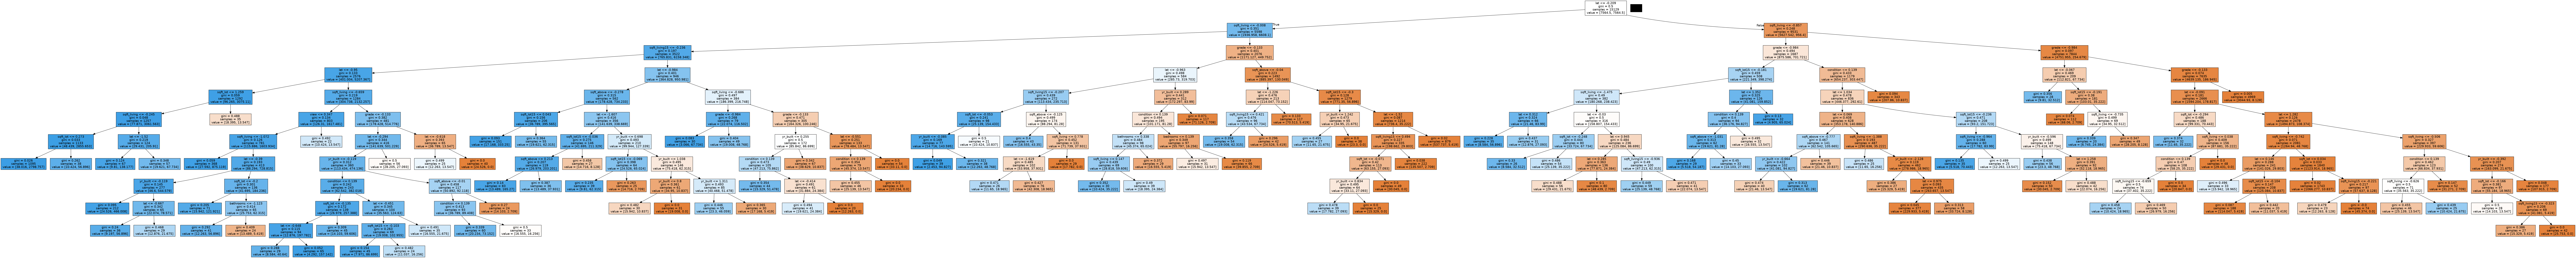

In [ ]:
# Visualising the tree and saving it to a file.
project_tree = StringIO()

# The decision tree is plotted as a graph and exported to a dot file using pydot.

tree.export_graphviz(dtree_best, out_file = project_tree, feature_names=X.columns, filled=True)
graph, = pydot.graph_from_dot_data(project_tree.getvalue())
Image(graph.create_png())

# The png image file was saved and uploaded in the files section under images folder.

In [ ]:
# Displaying an overall classification report for the model.

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      5293
         1.0       0.62      0.89      0.73      1191

    accuracy                           0.88      6484
   macro avg       0.80      0.88      0.83      6484
weighted avg       0.91      0.88      0.89      6484



<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
* The Best depth for the Decision Tree model was found to be 18 and the accuracy starts to become constant with further increase in depth. Also inorder to avoid an overfitted tree, various pruning parameter were optimised using a grid search cross-validation.<br /><br/>
    
* Apart from this, we used balanced class weights inorder to tackle the imbalance problem and attained a good accuracy of about 88 %. The decision tree was also visualised using the plot tree function. <br /><br />
    
* The more important points to focus here were the great improvement in recall for class 1 (Affordable) and also a higher number of true positives compared to previous model. Although, higher amount of false positives meant that the precision was quite low but aiming for a higher recall was more desirable for the problem.<br /><br />

## 4. Random Forest Classifier

In [ ]:
# Finding out the best number of estimators for Random Forest Algorithm.

estimators = np.arange(100, 501, 1)

# Initialising the model with appropriate parameters.

rf = RandomForestClassifier(warm_start=True, min_samples_leaf=20, min_samples_split=60, class_weight="balanced",
                               oob_score=True, max_depth = 15, random_state=20)

error_rate = []

# Setting different values of n_estimtors to the model.

for i in estimators:
    
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)
    
    # Storing the Out-of-bag error on a list.

    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)

# Finding the best n_estimator with minimum OOB error.

best_estimator = estimators[np.argmin(error_rate)]
    
print(f"The best no. of estimators for the Random Forest Model are :  {best_estimator} ")    

The best no. of estimators for the Random Forest Model are :  187 


Text(0.5, 1.0, 'The OOB error for Random Forest Models at different n_estimators')

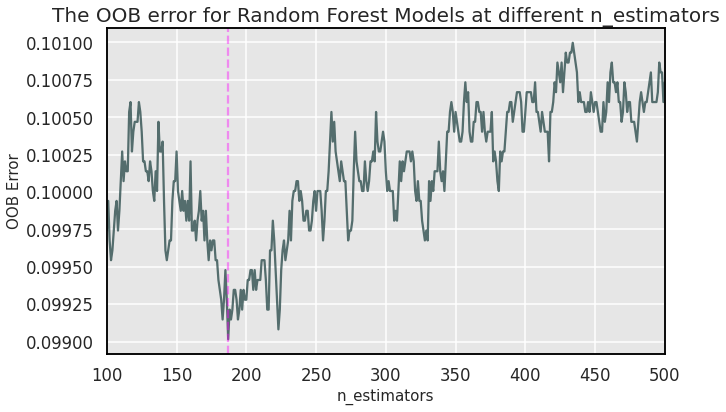

In [ ]:
# Plotting the oob error over different n_estimators of Random Forest model.

plt.figure(figsize=(10,6))

plt.plot(estimators, error_rate, color='darkslategrey', alpha=0.8)
plt.axvline(x=best_estimator, ls= '--', color='magenta', alpha=0.4)

plt.xlim(100, 500)
plt.xlabel("n_estimators", size=15)
plt.ylabel("OOB Error", size=15)
plt.title("The OOB error for Random Forest Models at different n_estimators", size=20)

In [ ]:
# Building the Random forest model with no. of estimators selected above and max_features set as square root of total features.

rf = RandomForestClassifier(n_estimators=best_estimator, min_samples_leaf=20, min_samples_split=60, class_weight="balanced",
                            max_features='sqrt', max_depth = 15, random_state=20)

rf.fit(X_train, y_train)

y_pred_forest = rf.predict(X_test)

# Calculating the accuracy and AUC of the model.

rf_acc = accuracy_score(y_test, y_pred_forest)
print(f"The Test accuracy for Decision Tree classifier is : {rf_acc*100:.4f} %\n")

y_proba = rf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, y_proba)

print(f"The Random Forest AUC is : {rf_auc:.4f} ")

The Test accuracy for Decision Tree classifier is : 89.4047 %

The Random Forest AUC is : 0.9621 


Text(0.5, 1.0, 'Feature Importances for Random Forest')

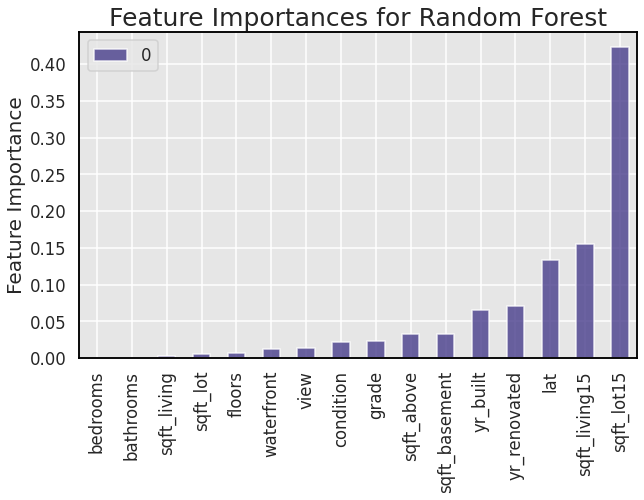

In [ ]:
# Plotting the Feature Importances for the random forest model.

importances = sorted(rf.feature_importances_)
feature_imp = pd.DataFrame(importances, index=X.columns)

feature_imp.plot.bar(color='darkslateblue', alpha=0.8, figsize=(10,6))


plt.ylabel("Feature Importance", size=20)
plt.title("Feature Importances for Random Forest", size=25)

[Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')]

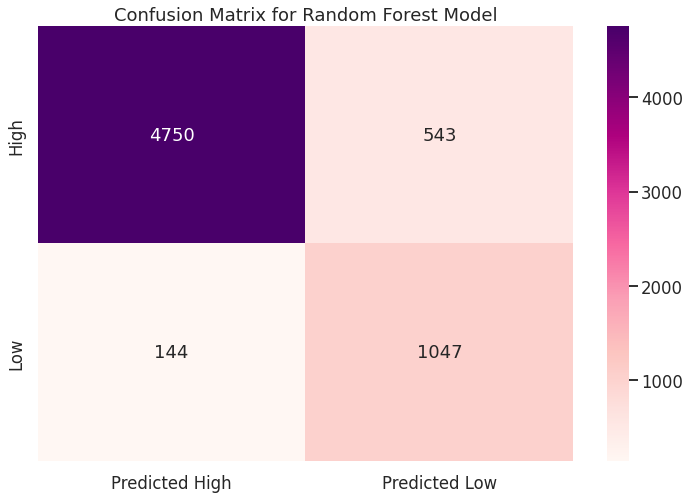

In [ ]:
# Plotting a confusion matrix for the Decision Tree Model.

cm_rf = confusion_matrix(y_test, y_pred_forest)
df_cm_rf = pd.DataFrame(cm_rf, index = ['High', 'Low'], columns = ['Predicted High','Predicted Low'])

plt.figure(figsize=(12,8))
sns.heatmap(df_cm_rf, annot=True, fmt='g', cmap='RdPu').set(title='Confusion Matrix for Random Forest Model')

In [ ]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      5293
         1.0       0.66      0.88      0.75      1191

    accuracy                           0.89      6484
   macro avg       0.81      0.89      0.84      6484
weighted avg       0.91      0.89      0.90      6484



<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
* The Best No. of estimators to build the Random forest model were found to be 467 and the variation with the out-of-bag error was plotted as a function of no. of estimators.<br /><br />
    
* There was improvement in overall accuracy of the model alongwith a high AUC value. We also plotted the feature importance for the random forest model, which suggested great dependence on features such as sqft_living15 , sqft_lot15, lat which measure the area of living for the houses around them and the geography. This shows that House prices are hugely governed by the location and also somewhat from year of building and renovation. <br /><br />
    
* Random forest gave slight improvement in the F1 score for both the classes over the decision tree, with other metrics mostly remaining similar.

## 5. Gradient Boosting and Ada Boost

### 5.1 Gradient Boost with and without Stopping parameters.

In [ ]:
# Building a Gradient Boosting model with a tolerance value set at 1e-4 over previous 5 iterations.

gd_boost = GradientBoostingClassifier(n_estimators=500, n_iter_no_change=5, tol=0.0001, max_features='sqrt', random_state=20)
gd_boost.fit(X_train, y_train)

y_pred_gb = gd_boost.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)

#Print accuracy score of test data

print(f"The No. of Estimators run for the Gradient Boost classifier are : {gd_boost.n_estimators_} ")
print(f"The Accuracy for Gradient Boost classifier is : {accuracy_gb*100:.4f} %")

The No. of Estimators run for the Gradient Boost classifier are : 177 
The Accuracy for Gradient Boost classifier is : 92.4429 %


In [ ]:
# Now Building another Gradient Boosting model with no stopping parameter.

gd_nostop = GradientBoostingClassifier(n_estimators=500, max_features='sqrt', random_state=20)
gd_nostop.fit(X_train, y_train)

y_pred_gbn = gd_nostop.predict(X_test)

accuracy_gbn = accuracy_score(y_test, y_pred_gbn)

#Print accuracy score of test data

print(f"The No. of Estimators run for the Gradient Boost classifier are : {gd_nostop.n_estimators_} ")
print(f"The Accuracy for Gradient Boost classifier is : {accuracy_gbn*100:.4f} %")

The No. of Estimators run for the Gradient Boost classifier are : 500 
The Accuracy for Gradient Boost classifier is : 92.7822 %


In [ ]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      5293
         1.0       0.82      0.75      0.79      1191

    accuracy                           0.92      6484
   macro avg       0.88      0.86      0.87      6484
weighted avg       0.92      0.92      0.92      6484



### 5.2 Ada Boost

In [ ]:
learning_rates = [1.5, 1.25, 1, 0.5, 0.1, 0.05]

val_accuracy = []

for l in learning_rates:

    ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=l, n_estimators=100 )
    
    cross_val_ada = cross_validate(ada_boost, X, Y, cv=5, scoring='accuracy')

    mean_acc_ada = np.mean(cross_val_ada['test_score'])

    val_accuracy.append(mean_acc_ada)

best_rate = learning_rates[np.argmax(val_accuracy)]
print(f"The best learning rate for Boosting Classifier is : {best_rate}")

The best learning rate for Boosting Classifier is : 0.5


In [ ]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=best_rate, n_estimators=100)
ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"The Accuracy for Ada Boost classifier is : {accuracy_ada*100:.4f} %")

The Accuracy for Ada Boost classifier is : 91.6410 %


Text(0.5, 1.0, 'Accuracy of AdaBoost Model at each Iteration')

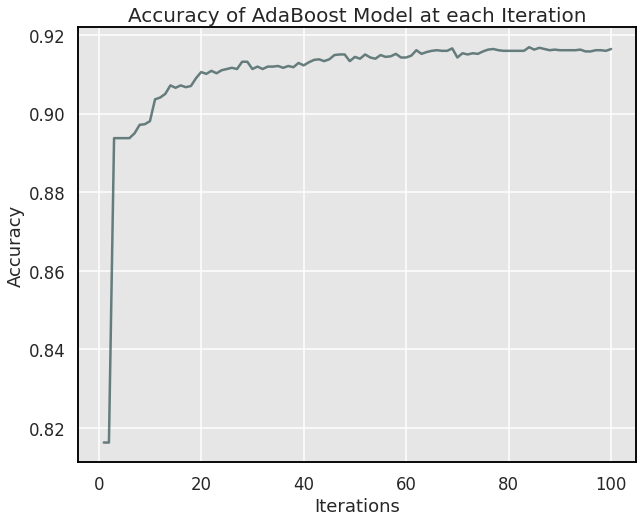

In [ ]:
ada_scores = []

for score in ada_boost.staged_score(X_test, y_test):
    ada_scores.append(score)
    
plt.figure(figsize=(10,8))

plt.plot(np.arange(1, 101, 1), ada_scores, linewidth=2.5, color='darkslategrey', alpha=0.7)
plt.ylabel("Accuracy")
plt.xlabel("Iterations")
plt.title("Accuracy of AdaBoost Model at each Iteration", size=20)

In [ ]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      5293
         1.0       0.79      0.74      0.76      1191

    accuracy                           0.92      6484
   macro avg       0.87      0.85      0.86      6484
weighted avg       0.91      0.92      0.92      6484



<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

* For Gradient Boosting with stopping parameters, we see that model builds only with 177 estimators and has a high accuracy. Although there is no accounting for the class imbalance, still boosting produces higher precision and f1 score than previous imbalanced models. There is only a slight improvement in accuracy for a non-stopping Gradient Boost model with 500 estimators.<br /><br />
    
* The optimal learning rate for Ada Boost model was found to be 0.5, which yielded an accuracy of about 91.64 %. We had also plotted the scores for the model at each iteration to understand the progress.<br /><br />
    
* Additionally, the perfomance metrics were slightly lower for Ada boost as compared to gradient boosting. However the recall remained more or less similar.<br /><br />    


## 6. ROC Curves

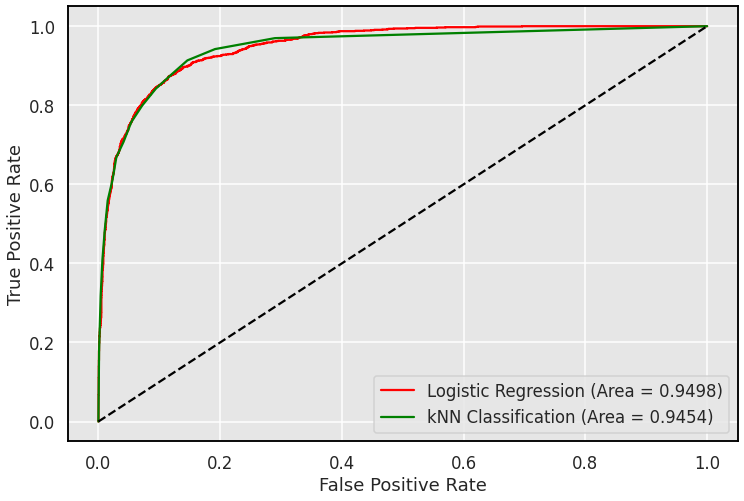

In [ ]:
# Comparision of ROC Curve for Logistic and kNN classification.

y_log = log_best.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_log)
log_auc = roc_auc_score(y_test, y_log)

y_knn = knn_best.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_knn)
knn_auc = roc_auc_score(y_test, y_knn)

plt.figure(figsize=(12, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (Area = {log_auc:.4f})', color='r') 
plt.plot(fpr_knn, tpr_knn, label=f'kNN Classification (Area = {knn_auc:.4f})', color='g')


plt.plot([0, 1], [0, 1],'k--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()

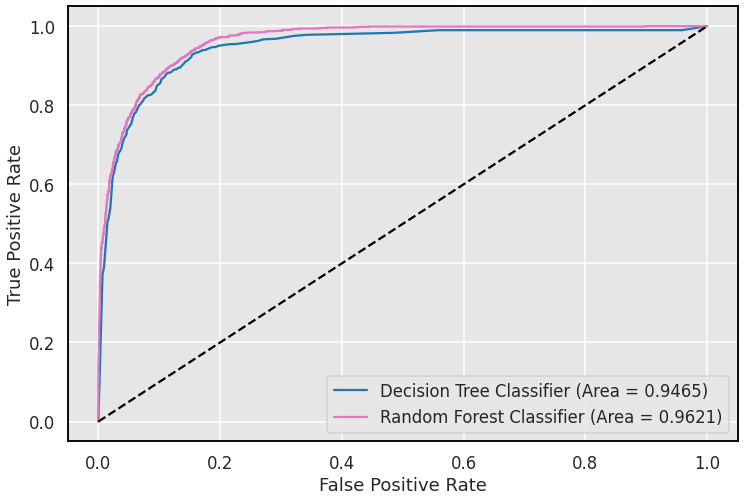

In [ ]:
# Comparision of ROC curves for Decision Trees and Random Forest models.

y_tree = dtree_best.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thersholds = roc_curve(y_test, y_tree)
tree_auc = roc_auc_score(y_test, y_tree)

y_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thersholds = roc_curve(y_test, y_rf)
rf_auc = roc_auc_score(y_test, y_rf)

plt.figure(figsize=(12, 8))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree Classifier (Area = {tree_auc:.4f})', color='tab:blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Classifier (Area = {rf_auc:.4f})', color='tab:pink')

plt.plot([0, 1], [0, 1],'k--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()

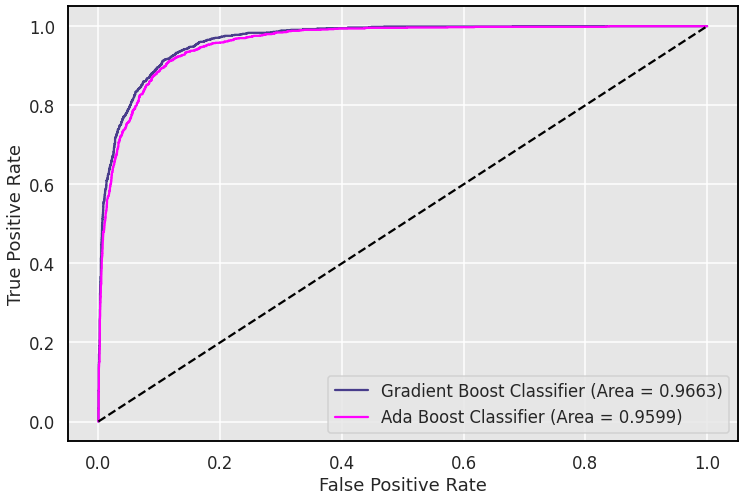

In [ ]:
# Comparision of ROC curves for Boosting ensemble models.

y_gd = gd_boost.predict_proba(X_test)[:, 1]
fpr_gd, tpr_gd, thersholds = roc_curve(y_test, y_gd)
gd_auc = roc_auc_score(y_test, y_gd)

y_ada = ada_boost.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, thersholds = roc_curve(y_test, y_ada)
ada_auc = roc_auc_score(y_test, y_ada)

plt.figure(figsize=(12, 8))
plt.plot(fpr_gd, tpr_gd, label=f'Gradient Boost Classifier (Area = {gd_auc:.4f})', color='darkslateblue')
plt.plot(fpr_ada, tpr_ada, label=f'Ada Boost Classifier (Area = {ada_auc:.4f})', color='magenta')

plt.plot([0, 1], [0, 1],'k--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

* ROC curves for the various models built for classification have somewhat similar pattern overall. We have compared the to initial imbalanced class models and then the Decision Tree and Random Forest. Atlast we have the Boosting models.<br /><br />
    
* Going downwards, we see significant improvement in the AUC score, with both boosting models giving really high scores and gradient boosting being the highest.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## 7. Upsampling Techniques : SMOTE

Since, we had an imbalance in the dataset for Logisitic Regression and kNN classification, we will apply an upsampling technique known as SMOTE to balance the two classes and then train the model on the new sampled dataset. We would then infer the new results and examine the effects.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(Y)
print(counter,"\n")

# Oversampling the imbalanced class using SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X_scaled, Y)

# Taking a look at the new class distribution
counter = Counter(Y)
print("New Distribution of Classes:\n",counter)

Counter({0.0: 17630, 1.0: 3983}) 

New Distribution of Classes:
 Counter({1.0: 17630, 0.0: 17630})


## 7.1 Logistic regression and kNN with SMOTE

In [ ]:
# Splitting the upsampled dataset and training a logistic model with it.

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=103)

log_reg =  LogisticRegression(max_iter=10000, C=0.1)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Reporting the F1 score and Accuracy on the upsampled data.

log_reg_f1 = f1_score(y_test, y_pred)

print(f"The f1 score for Logistic model with oversampling : {log_reg_f1:.4f} ")
print(f"The Accuracy for Logistic model with oversampling : {accuracy_score(y_test,y_pred)*100:.4f}%")

The f1 score for Logistic model with oversampling : 0.8872 
The Accuracy for Logistic model with oversampling : 88.5328%


[Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')]

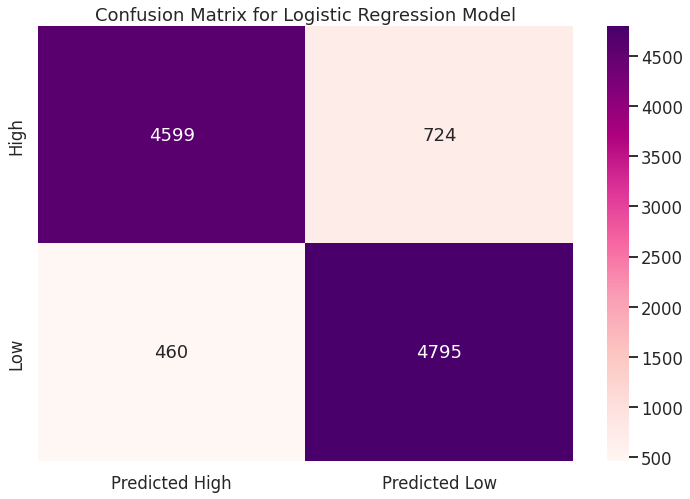

In [ ]:
# Plotting a confusion matrix for the logistic Model with upsampled data.

cm_log = confusion_matrix(y_test, y_pred)
df_cm_log = pd.DataFrame(cm_log, index = ['High', 'Low'], columns = ['Predicted High','Predicted Low'])

plt.figure(figsize=(12,8))
sns.heatmap(df_cm_log, annot=True, fmt='g', cmap='RdPu').set(title='Confusion Matrix for Logistic Regression Model')

In [ ]:
# Training a kNN classification model with upsampled data.

knn_best = KNeighborsClassifier(n_neighbors=15)

knn_best.fit(X_train, y_train)

ypred_knntest = knn_best.predict(X_test)

# Reporting the F1 score and Accuracy on the upsampled data.

knn_acc_test = accuracy_score(y_test, ypred_knntest)
knn_f1 = f1_score(y_test, ypred_knntest)

print(f"The f1 score for kNN classification with oversampling : {knn_f1:.4f} ")
print(f"The Test accuracy for kNN Classification with oversampling : {knn_acc_test*100:.4f} %")

The f1 score for kNN classification with oversampling : 0.9135 
The Test accuracy for kNN Classification with oversampling : 90.9718 %


[Text(0.5, 1.0, 'Confusion Matrix for kNN Classification Model')]

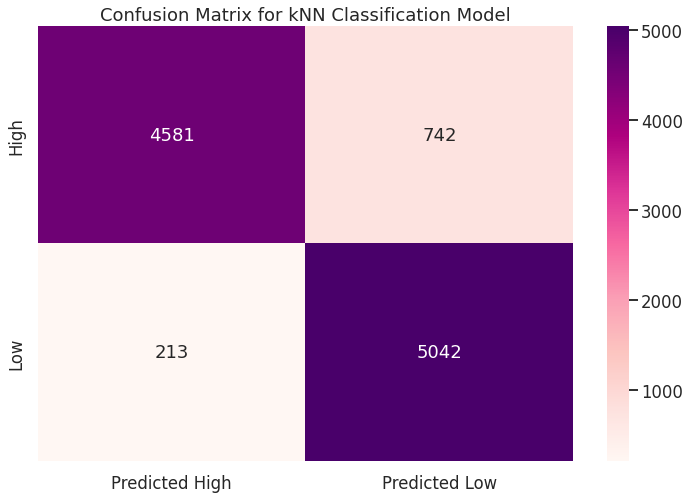

In [ ]:
# Plotting a confusion matrix for the kNN Model.

cm_knn = confusion_matrix(y_test, ypred_knntest)
df_cm_knn = pd.DataFrame(cm_knn, index = ['High', 'Low'], columns = ['Predicted High','Predicted Low'])

plt.figure(figsize=(12,8))
sns.heatmap(df_cm_knn, annot=True, fmt='g', cmap='RdPu').set(title='Confusion Matrix for kNN Classification Model')

In [ ]:
# Displaying an overall classification report for the upsampled Logistic model.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89      5323
         1.0       0.87      0.91      0.89      5255

    accuracy                           0.89     10578
   macro avg       0.89      0.89      0.89     10578
weighted avg       0.89      0.89      0.89     10578



In [ ]:
# Displaying an overall classification report for the upsampled kNN model.

print(classification_report(y_test, ypred_knntest))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      5323
         1.0       0.87      0.96      0.91      5255

    accuracy                           0.91     10578
   macro avg       0.91      0.91      0.91     10578
weighted avg       0.91      0.91      0.91     10578



## 7.2 Gradient Boosting with SMOTE

In [ ]:


gd_boost = GradientBoostingClassifier(n_estimators=500, n_iter_no_change=5, tol=1e-5, max_features='sqrt', random_state=20)
gd_boost.fit(X_train, y_train)

y_pred_gb = gd_boost.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)

#Print accuracy score of test data

print(f"The No. of Estimators run for the Gradient Boost classifier are : {gd_boost.n_estimators_} ")
print(f"The Accuracy for Gradient Boost classifier is : {accuracy_gb*100:.4f} %")

The No. of Estimators run for the Gradient Boost classifier are : 423 
The Accuracy for Gradient Boost classifier is : 93.1462 %


In [ ]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      5323
         1.0       0.92      0.95      0.93      5255

    accuracy                           0.93     10578
   macro avg       0.93      0.93      0.93     10578
weighted avg       0.93      0.93      0.93     10578



[Text(0.5, 1.0, 'Confusion Matrix for Gradient Boost Model')]

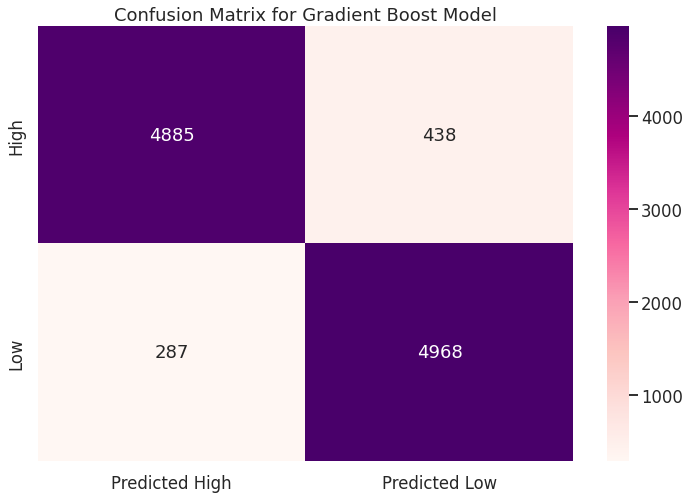

In [ ]:
# plotting confusion matrix for Gradient boost model with upsampled data

cm_gb = confusion_matrix(y_test, y_pred_gb)
df_cm_gb = pd.DataFrame(cm_gb, index = ['High', 'Low'], columns = ['Predicted High','Predicted Low'])

plt.figure(figsize=(12,8))
sns.heatmap(df_cm_gb, annot=True, fmt='g', cmap='RdPu').set(title='Confusion Matrix for Gradient Boost Model')

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

## Comparision of Upsampled Models and the Original ones.

* Firstly, we see that although the overall accuracy for Logistic model and kNN model both decrease slightly on the upsampled data, but this is due to the exaggeration of accuracy for previous imbalanced models where the accuracy was boosted due to the huge no. of samples in class 0 (Expensive Houses).<br /><br />

* For the upsampled models, we see great improvements in the metrics for class 1 (Affordable Houses), which was upsampled and thus represents a better model compared to the earlier ones.<br /><br />

* Among the two models, kNN again performs better overall against the logistic model for class 1 on metrics such as recall, which is important in this case for people generally looking for an affordable house.<br /><br />
    
* We also built a Gradient Boost model with upsampled data, where the accuracy was similar to the original model, but there was a significant increase in the recall and f1 score of the model, which makes it overall the best model in this study.<br /><br />